## Resources used:
https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/ <br>
https://towardsdatascience.com/stock-analysis-in-python-a0054e2c1a4c

In [1]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

!pip install yfinance

import yfinance as yf

%matplotlib inline

# yahoo finance API: 5 year data (open, high, low, close, volume)

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=beaed16e247531c71ffd1df8e319ea1ae68b0ff6af4765071631a0687d4a2f71
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [2]:
start = "2017-01-01"
end = '2022-01-01'
tcs = yf.download('TCS',start,end)
infy = yf.download('INFY',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Absolute prices for TCS, Infosys and Wipro

Text(0.5, 1.0, 'Stock Prices of TCS, Infosys and Wipro')

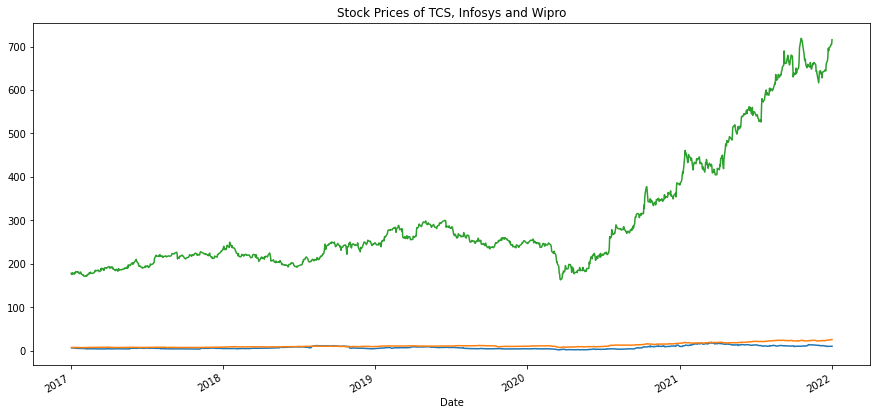

In [3]:
tcs['Open'].plot(label = 'TCS', figsize = (15,7))
infy['Open'].plot(label = "Infosys")
wipro['Open'].plot(label = 'Wipro')
plt.title('Stock Prices of TCS, Infosys and Wipro')

### Understand how stocks fluctuate over time

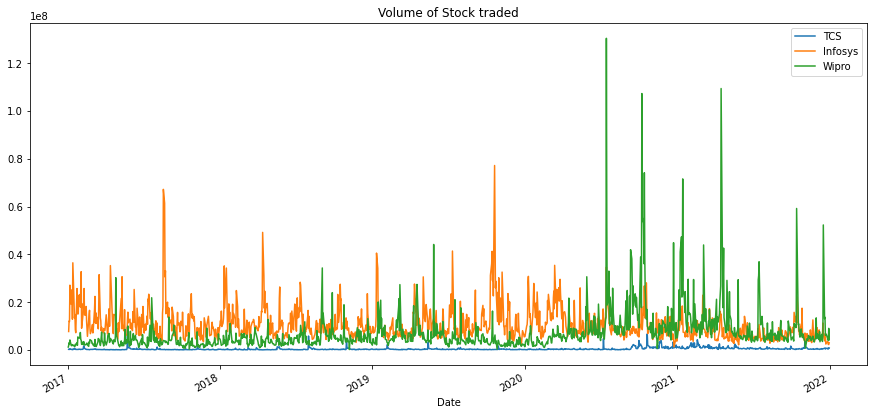

In [4]:
tcs['Volume'].plot(label = 'TCS', figsize = (15,7))
infy['Volume'].plot(label = "Infosys")
wipro['Volume'].plot(label = 'Wipro')
plt.title('Volume of Stock traded')
plt.legend()

# shows that stocks of Infosys are traded more compared to other 2 IT stocks

### Market Capitalisation

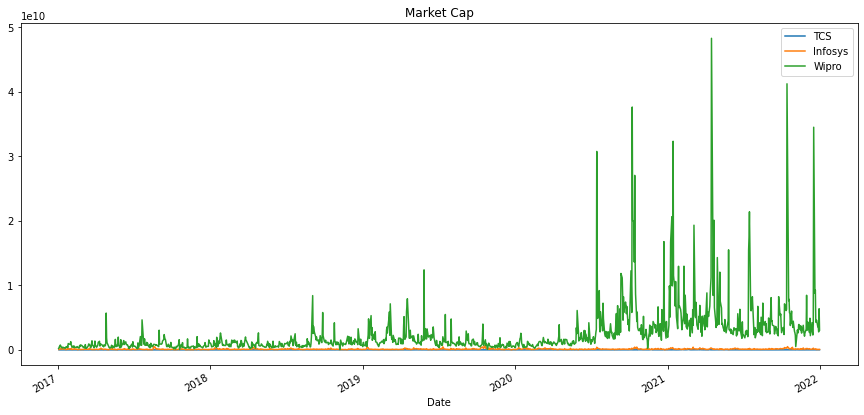

In [5]:
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

# plot graph for volume * share to better compare the companies
# Wipro is shown to be traded on the higher side

### Moving average

<AxesSubplot:xlabel='Date'>

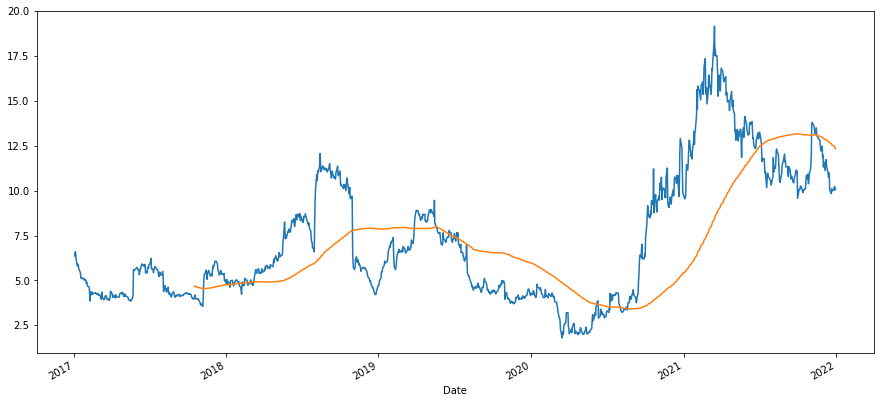

In [8]:
# Using 200-day average on tcs

tcs['MA200'] = tcs['Open'].rolling(200).mean()

tcs['Open'].plot(figsize = (15,7))

tcs['MA200'].plot()

<AxesSubplot:xlabel='Date'>

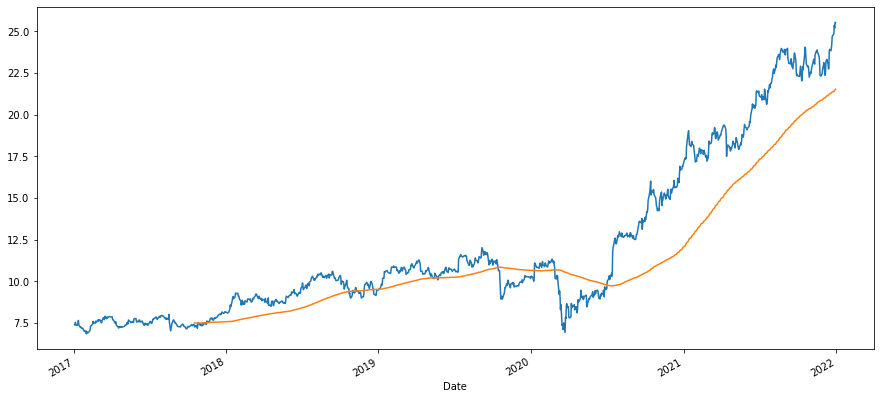

In [9]:
# Using 200-day average on infy

infy['MA200'] = infy['Open'].rolling(200).mean()

infy['Open'].plot(figsize = (15,7))

infy['MA200'].plot()

<AxesSubplot:xlabel='Date'>

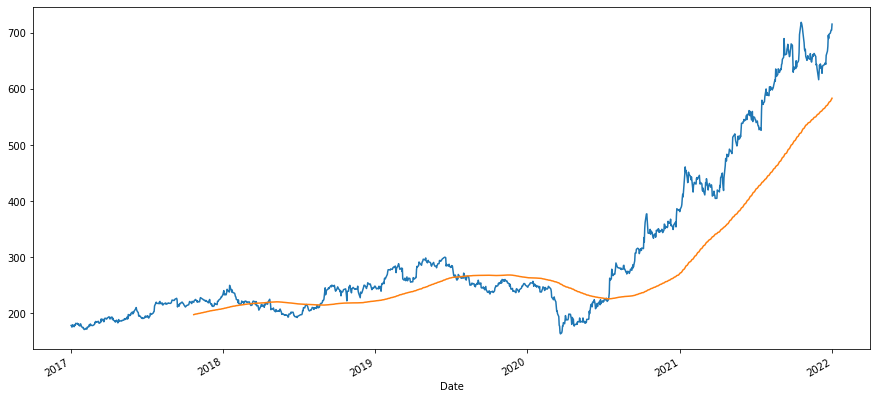

In [10]:
# Using 200-day average on wipro

wipro['MA200'] = wipro['Open'].rolling(200).mean()

wipro['Open'].plot(figsize = (15,7))

wipro['MA200'].plot()

### Scattered plot matrix

array([[<AxesSubplot:xlabel='TCSOpen', ylabel='TCSOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='TCSOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='TCSOpen'>],
       [<AxesSubplot:xlabel='TCSOpen', ylabel='InfosysOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='InfosysOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='InfosysOpen'>],
       [<AxesSubplot:xlabel='TCSOpen', ylabel='WiproOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='WiproOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='WiproOpen'>]],
      dtype=object)

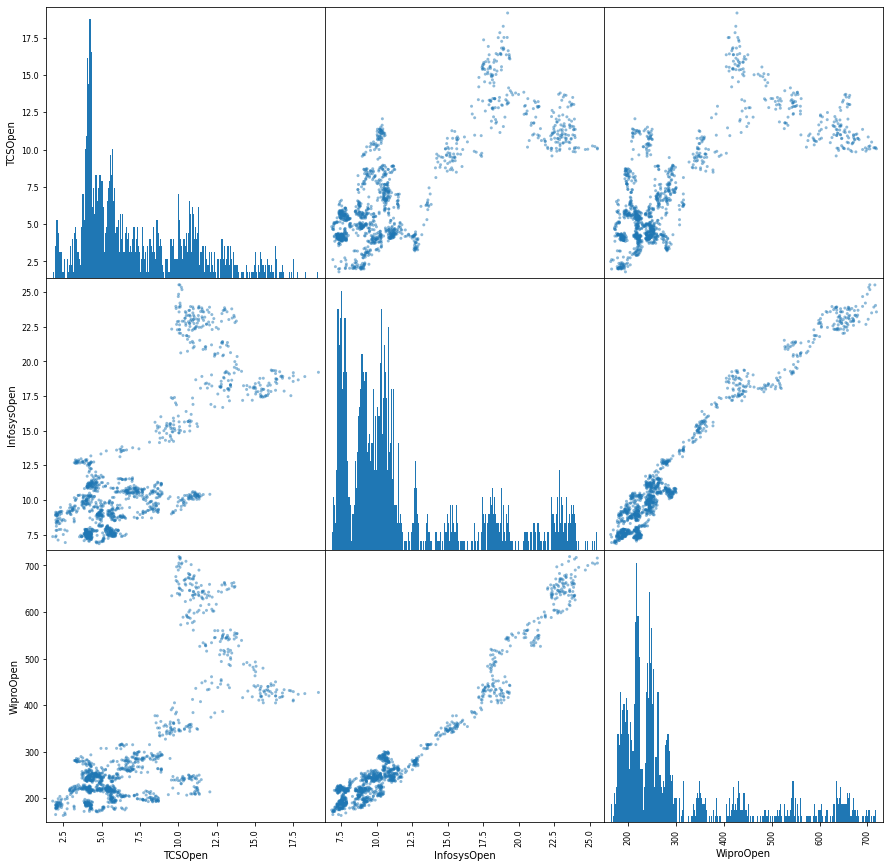

In [12]:
data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (15,15), hist_kwds= {'bins':250})

# shows that Wipro stocks are loosely showing a linear correlation with infosys

### Percentage increase in stock value

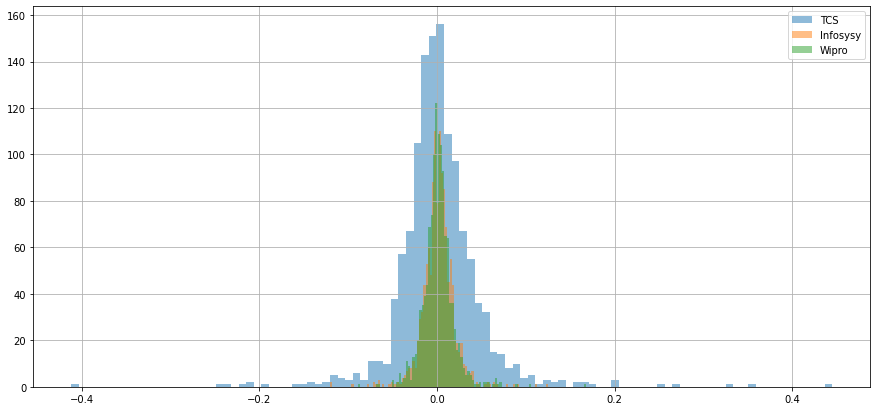

In [13]:
#Volatility
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()

# % increase in stock price histogram for TCS is the widest = stock of TCS is most volatile